<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Billboard%20(Hoarding%20detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on Focal Loss: https://arxiv.org/abs/1708.02002

2. Blog 1 on RetinaNet: https://medium.com/@14prakash/the-intuition-behind-retinanet-eb636755607d

3. Blog 2 on RetinaNet: https://blog.zenggyu.com/en/post/2018-12-05/retinanet-explained-and-demystified/

4. Blog 3 on RetinaNet: https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

5. Blog 4 on RetinaNet: https://analyticsindiamag.com/what-is-retinanet-ssd-focal-loss/

6. Blog 5 on RetinaNet: https://towardsdatascience.com/object-detection-on-aerial-imagery-using-retinanet-626130ba2203

# Table of contents


## 1. Installattion Instructions



## 2. Use trained model to detect billboard in images



## 3. How to train using Open Images dataset (billboard subset)

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/5_pytorch_retinanet/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/5_pytorch_retinanet/installation && cat requirements_cuda.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TBG8ItJ6608D68iFrUhcN7koehXD3QBg" -O billboard_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq billboard_trained.zip

In [8]:
gtf.Model(model_path="billboard_trained/final_model.pt");

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [4]:
f = open("billboard_trained/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

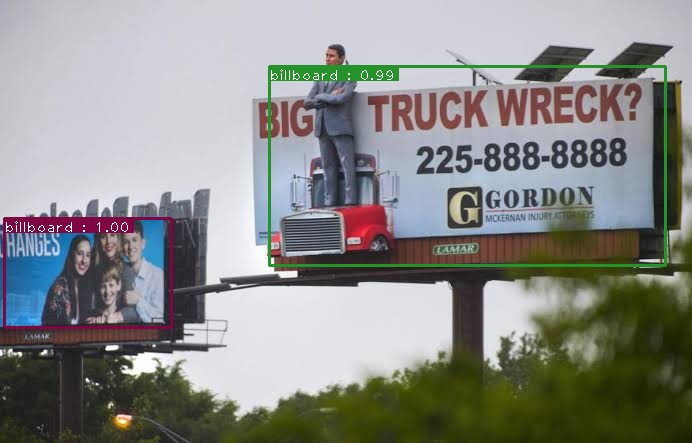

In [11]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

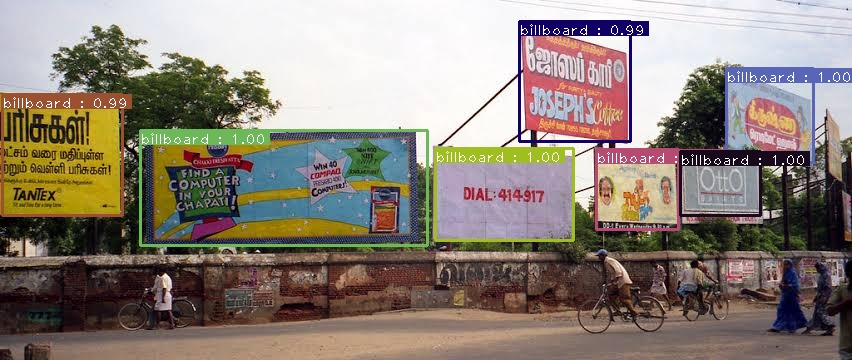

In [12]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

# Train you own detector

# Dataset

  - Credits - https://storage.googleapis.com/openimages/web/index.html
  
  - Collected using - https://github.com/EscVM/OIDv4_ToolKit
  
       - Command used to collect (inside OIDv4_ToolKit)
         - python main.py downloader --classes Apple Orange --type_csv validation
         
  - Converted the dataset to COCO format

In [49]:
# Download the dataset

In [50]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v" -O billboard.zip && rm -rf /tmp/cookies.txt

--2020-01-13 12:19:07--  https://docs.google.com/uc?export=download&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v
Resolving docs.google.com (docs.google.com)... 172.217.167.142, 2404:6800:4007:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.167.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-01-13 12:19:08 (14.7 MB/s) - written to stdout [3258]

--2020-01-13 12:19:08--  https://docs.google.com/uc?export=download&confirm=IyeM&id=1nqsDz8USRCotC5m-a_0M3Kd74s0bre2v
Resolving docs.google.com (docs.google.com)... 172.217.167.142, 2404:6800:4007:803::200e
Connecting to docs.google.com (docs.google.com)|172.217.167.142|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lltm064pn7tmhspt4acmohlo2hco

In [51]:
! unzip -q billboard.zip

# COCO Format - 2

## Dataset Directory Structure

         ./ (root_dir)
          |
          |------billboard (coco_dir) 
          |         |
          |         |---Images (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Images.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "./";
 - coco_dir = "billboard";
 - img_dir = "./";
 - set_dir = "Images";

 
 Note: Annotation file name too coincides against the set_dir

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
root_dir = "./";
coco_dir = "billboard";
img_dir = "./";
set_dir = "Images";

In [5]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=2, use_gpu=True)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Num training images: 3399


In [6]:
gtf.Model(model_name="resnet50");

In [7]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, print_interval=20)

In [ ]:
gtf.Train(num_epochs=17, output_model_name="final_model.pt");

Epoch: 0 | Iteration: 0 | Classification loss: 1.13110 | Regression loss: 1.02373 | Running loss: 2.15482
Epoch: 0 | Iteration: 20 | Classification loss: 2.24361 | Regression loss: 1.05675 | Running loss: 2.07946
Epoch: 0 | Iteration: 40 | Classification loss: 0.57757 | Regression loss: 1.00589 | Running loss: 1.91662
Epoch: 0 | Iteration: 60 | Classification loss: 0.36085 | Regression loss: 0.89557 | Running loss: 1.80841
Epoch: 0 | Iteration: 80 | Classification loss: 0.59516 | Regression loss: 0.96658 | Running loss: 1.79736
Epoch: 0 | Iteration: 100 | Classification loss: 0.57600 | Regression loss: 0.84771 | Running loss: 1.74564
Epoch: 0 | Iteration: 120 | Classification loss: 0.44557 | Regression loss: 0.85944 | Running loss: 1.68978
Epoch: 0 | Iteration: 140 | Classification loss: 0.43157 | Regression loss: 0.97050 | Running loss: 1.66194
Epoch: 0 | Iteration: 160 | Classification loss: 0.50094 | Regression loss: 0.99442 | Running loss: 1.61975
Epoch: 0 | Iteration: 180 | Classi

Epoch: 0 | Iteration: 1500 | Classification loss: 0.39264 | Regression loss: 0.52124 | Running loss: 0.88232
Epoch: 0 | Iteration: 1520 | Classification loss: 0.25331 | Regression loss: 0.51486 | Running loss: 0.88182
Epoch: 0 | Iteration: 1540 | Classification loss: 0.31986 | Regression loss: 0.11240 | Running loss: 0.87543
Epoch: 0 | Iteration: 1560 | Classification loss: 0.44481 | Regression loss: 0.77645 | Running loss: 0.87557
Epoch: 0 | Iteration: 1580 | Classification loss: 0.21058 | Regression loss: 0.46739 | Running loss: 0.87669
Epoch: 0 | Iteration: 1600 | Classification loss: 0.24949 | Regression loss: 0.37346 | Running loss: 0.87327
Epoch: 0 | Iteration: 1620 | Classification loss: 0.28725 | Regression loss: 0.53073 | Running loss: 0.87009
Epoch: 0 | Iteration: 1640 | Classification loss: 0.29429 | Regression loss: 0.58445 | Running loss: 0.87132
Epoch: 0 | Iteration: 1660 | Classification loss: 0.40956 | Regression loss: 0.76851 | Running loss: 0.87068
Epoch: 0 | Iteratio

/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type DataParallel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/abhi/.virtualenvs/monk_obj_5_retinanet/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type 

Epoch: 1 | Iteration: 0 | Classification loss: 0.22197 | Regression loss: 0.50451 | Running loss: 0.85818
Epoch: 1 | Iteration: 20 | Classification loss: 0.30719 | Regression loss: 0.41229 | Running loss: 0.86123
Epoch: 1 | Iteration: 40 | Classification loss: 0.35553 | Regression loss: 0.60081 | Running loss: 0.85448
Epoch: 1 | Iteration: 60 | Classification loss: 0.33644 | Regression loss: 0.54062 | Running loss: 0.86148
Epoch: 1 | Iteration: 80 | Classification loss: 0.21326 | Regression loss: 0.40088 | Running loss: 0.85788
Epoch: 1 | Iteration: 100 | Classification loss: 0.35883 | Regression loss: 0.52437 | Running loss: 0.85279
Epoch: 1 | Iteration: 120 | Classification loss: 0.29456 | Regression loss: 0.45554 | Running loss: 0.84825
Epoch: 1 | Iteration: 140 | Classification loss: 0.25746 | Regression loss: 0.36710 | Running loss: 0.83968
Epoch: 1 | Iteration: 160 | Classification loss: 0.78164 | Regression loss: 0.47636 | Running loss: 0.83712
Epoch: 1 | Iteration: 180 | Classi

Epoch: 1 | Iteration: 1500 | Classification loss: 0.20476 | Regression loss: 0.37165 | Running loss: 0.73900
Epoch: 1 | Iteration: 1520 | Classification loss: 0.35389 | Regression loss: 0.43050 | Running loss: 0.73161
Epoch: 1 | Iteration: 1540 | Classification loss: 0.35974 | Regression loss: 0.53322 | Running loss: 0.73004
Epoch: 1 | Iteration: 1560 | Classification loss: 0.31124 | Regression loss: 0.46862 | Running loss: 0.72798
Epoch: 1 | Iteration: 1580 | Classification loss: 0.12662 | Regression loss: 0.61097 | Running loss: 0.72662
Epoch: 1 | Iteration: 1600 | Classification loss: 0.13885 | Regression loss: 0.37770 | Running loss: 0.71504
Epoch: 1 | Iteration: 1620 | Classification loss: 0.15862 | Regression loss: 0.28320 | Running loss: 0.71873
Epoch: 1 | Iteration: 1640 | Classification loss: 0.27845 | Regression loss: 0.38417 | Running loss: 0.71671
Epoch: 1 | Iteration: 1660 | Classification loss: 0.10685 | Regression loss: 0.41849 | Running loss: 0.72501
Epoch: 1 | Iteratio

Epoch: 2 | Iteration: 1300 | Classification loss: 0.09918 | Regression loss: 0.32673 | Running loss: 0.63963
Epoch: 2 | Iteration: 1320 | Classification loss: 0.27410 | Regression loss: 0.43879 | Running loss: 0.63923
Epoch: 2 | Iteration: 1340 | Classification loss: 0.07814 | Regression loss: 0.33770 | Running loss: 0.63331
Epoch: 2 | Iteration: 1360 | Classification loss: 0.15894 | Regression loss: 0.29734 | Running loss: 0.63205
Epoch: 2 | Iteration: 1380 | Classification loss: 0.04960 | Regression loss: 0.24585 | Running loss: 0.63200
Epoch: 2 | Iteration: 1400 | Classification loss: 0.13561 | Regression loss: 0.43668 | Running loss: 0.63348
Epoch: 2 | Iteration: 1420 | Classification loss: 0.37108 | Regression loss: 0.45355 | Running loss: 0.63760
Epoch: 2 | Iteration: 1440 | Classification loss: 0.59905 | Regression loss: 0.77900 | Running loss: 0.63786
Epoch: 2 | Iteration: 1460 | Classification loss: 0.17448 | Regression loss: 0.29470 | Running loss: 0.63469
Epoch: 2 | Iteratio

Epoch: 3 | Iteration: 1120 | Classification loss: 0.21483 | Regression loss: 0.59908 | Running loss: 0.66054
Epoch: 3 | Iteration: 1140 | Classification loss: 0.16069 | Regression loss: 0.46751 | Running loss: 0.66183
Epoch: 3 | Iteration: 1160 | Classification loss: 0.14730 | Regression loss: 0.32712 | Running loss: 0.65644
Epoch: 3 | Iteration: 1180 | Classification loss: 0.06897 | Regression loss: 0.22730 | Running loss: 0.65554
Epoch: 3 | Iteration: 1200 | Classification loss: 0.22669 | Regression loss: 0.36154 | Running loss: 0.65328
Epoch: 3 | Iteration: 1220 | Classification loss: 0.15256 | Regression loss: 0.37693 | Running loss: 0.65689
Epoch: 3 | Iteration: 1240 | Classification loss: 0.35408 | Regression loss: 0.70581 | Running loss: 0.65298
Epoch: 3 | Iteration: 1260 | Classification loss: 0.28787 | Regression loss: 0.46660 | Running loss: 0.65022
Epoch: 3 | Iteration: 1280 | Classification loss: 0.05437 | Regression loss: 0.23486 | Running loss: 0.64715
Epoch: 3 | Iteratio

Epoch: 4 | Iteration: 920 | Classification loss: 0.14608 | Regression loss: 0.34018 | Running loss: 0.56763
Epoch: 4 | Iteration: 940 | Classification loss: 0.15978 | Regression loss: 0.28231 | Running loss: 0.58466
Epoch: 4 | Iteration: 960 | Classification loss: 0.24498 | Regression loss: 0.39417 | Running loss: 0.58090
Epoch: 4 | Iteration: 980 | Classification loss: 0.63137 | Regression loss: 0.73918 | Running loss: 0.58078
Epoch: 4 | Iteration: 1000 | Classification loss: 0.32566 | Regression loss: 0.45083 | Running loss: 0.58733
Epoch: 4 | Iteration: 1020 | Classification loss: 0.12673 | Regression loss: 0.30769 | Running loss: 0.59169
Epoch: 4 | Iteration: 1040 | Classification loss: 0.09221 | Regression loss: 0.23014 | Running loss: 0.59244
Epoch: 4 | Iteration: 1060 | Classification loss: 0.07014 | Regression loss: 0.32830 | Running loss: 0.59888
CUDA out of memory. Tried to allocate 36.00 MiB (GPU 0; 5.94 GiB total capacity; 4.71 GiB already allocated; 31.75 MiB free; 264.52 

Epoch: 5 | Iteration: 720 | Classification loss: 0.11625 | Regression loss: 0.12949 | Running loss: 0.51322
Epoch: 5 | Iteration: 740 | Classification loss: 0.28839 | Regression loss: 0.37865 | Running loss: 0.51028
Epoch: 5 | Iteration: 760 | Classification loss: 0.46813 | Regression loss: 0.56239 | Running loss: 0.50707
Epoch: 5 | Iteration: 780 | Classification loss: 0.18758 | Regression loss: 0.47912 | Running loss: 0.50076
Epoch: 5 | Iteration: 800 | Classification loss: 0.12803 | Regression loss: 0.32569 | Running loss: 0.49851
Epoch: 5 | Iteration: 820 | Classification loss: 0.21233 | Regression loss: 0.32789 | Running loss: 0.49950
Epoch: 5 | Iteration: 840 | Classification loss: 0.02735 | Regression loss: 0.20155 | Running loss: 0.50258
Epoch: 5 | Iteration: 860 | Classification loss: 0.03077 | Regression loss: 0.21638 | Running loss: 0.50090
Epoch: 5 | Iteration: 880 | Classification loss: 0.07768 | Regression loss: 0.28853 | Running loss: 0.49998
Epoch: 5 | Iteration: 900 | 

Epoch: 6 | Iteration: 520 | Classification loss: 0.03526 | Regression loss: 0.20292 | Running loss: 0.45509
Epoch: 6 | Iteration: 540 | Classification loss: 0.09480 | Regression loss: 0.27752 | Running loss: 0.45321
Epoch: 6 | Iteration: 560 | Classification loss: 0.02327 | Regression loss: 0.22157 | Running loss: 0.45057
Epoch: 6 | Iteration: 580 | Classification loss: 0.17071 | Regression loss: 0.34160 | Running loss: 0.45293
Epoch: 6 | Iteration: 600 | Classification loss: 0.10450 | Regression loss: 0.18593 | Running loss: 0.45363
Epoch: 6 | Iteration: 620 | Classification loss: 0.16288 | Regression loss: 0.29216 | Running loss: 0.45072
Epoch: 6 | Iteration: 640 | Classification loss: 0.07825 | Regression loss: 0.23236 | Running loss: 0.46248
Epoch: 6 | Iteration: 660 | Classification loss: 0.12522 | Regression loss: 0.47330 | Running loss: 0.46752
Epoch: 6 | Iteration: 680 | Classification loss: 0.03032 | Regression loss: 0.22882 | Running loss: 0.46679
Epoch: 6 | Iteration: 700 | 

Epoch: 7 | Iteration: 320 | Classification loss: 0.14755 | Regression loss: 0.24703 | Running loss: 0.42173
Epoch: 7 | Iteration: 340 | Classification loss: 0.01806 | Regression loss: 0.11154 | Running loss: 0.41843
Epoch: 7 | Iteration: 360 | Classification loss: 0.15628 | Regression loss: 0.33018 | Running loss: 0.41693
Epoch: 7 | Iteration: 380 | Classification loss: 0.22508 | Regression loss: 0.34828 | Running loss: 0.41323
Epoch: 7 | Iteration: 400 | Classification loss: 0.04017 | Regression loss: 0.13557 | Running loss: 0.41251
Epoch: 7 | Iteration: 420 | Classification loss: 0.09090 | Regression loss: 0.20294 | Running loss: 0.41082
Epoch: 7 | Iteration: 440 | Classification loss: 0.18007 | Regression loss: 0.35096 | Running loss: 0.41164
Epoch: 7 | Iteration: 460 | Classification loss: 0.09076 | Regression loss: 0.30105 | Running loss: 0.41024
Epoch: 7 | Iteration: 480 | Classification loss: 0.00987 | Regression loss: 0.14649 | Running loss: 0.40491
Epoch: 7 | Iteration: 500 | 

Epoch: 8 | Iteration: 120 | Classification loss: 0.20057 | Regression loss: 0.39971 | Running loss: 0.40645
Epoch: 8 | Iteration: 140 | Classification loss: 0.02547 | Regression loss: 0.15554 | Running loss: 0.40366
Epoch: 8 | Iteration: 160 | Classification loss: 0.07566 | Regression loss: 0.24061 | Running loss: 0.39961
Epoch: 8 | Iteration: 180 | Classification loss: 0.02147 | Regression loss: 0.13584 | Running loss: 0.39723
Epoch: 8 | Iteration: 200 | Classification loss: 0.06368 | Regression loss: 0.32862 | Running loss: 0.39451
Epoch: 8 | Iteration: 220 | Classification loss: 0.16093 | Regression loss: 0.37712 | Running loss: 0.39367
Epoch: 8 | Iteration: 240 | Classification loss: 0.04608 | Regression loss: 0.24631 | Running loss: 0.39251
Epoch: 8 | Iteration: 260 | Classification loss: 0.05820 | Regression loss: 0.20193 | Running loss: 0.38782
Epoch: 8 | Iteration: 280 | Classification loss: 0.05599 | Regression loss: 0.22309 | Running loss: 0.38669
Epoch: 8 | Iteration: 300 | 

Epoch: 8 | Iteration: 1620 | Classification loss: 0.11223 | Regression loss: 0.30565 | Running loss: 0.38828
Epoch: 8 | Iteration: 1640 | Classification loss: 0.02673 | Regression loss: 0.18836 | Running loss: 0.38692
Epoch: 8 | Iteration: 1660 | Classification loss: 0.17127 | Regression loss: 0.29457 | Running loss: 0.38786
Epoch: 8 | Iteration: 1680 | Classification loss: 0.18954 | Regression loss: 0.37372 | Running loss: 0.38557
Epoch: 9 | Iteration: 0 | Classification loss: 0.28000 | Regression loss: 0.37111 | Running loss: 0.38913
Epoch: 9 | Iteration: 20 | Classification loss: 0.02000 | Regression loss: 0.15543 | Running loss: 0.38601
Epoch: 9 | Iteration: 40 | Classification loss: 0.11934 | Regression loss: 0.24419 | Running loss: 0.37957
Epoch: 9 | Iteration: 60 | Classification loss: 0.11206 | Regression loss: 0.29768 | Running loss: 0.38134
Epoch: 9 | Iteration: 80 | Classification loss: 0.14536 | Regression loss: 0.39193 | Running loss: 0.37996
CUDA out of memory. Tried to a

Epoch: 9 | Iteration: 1440 | Classification loss: 0.04780 | Regression loss: 0.22156 | Running loss: 0.34982
Epoch: 9 | Iteration: 1460 | Classification loss: 0.04205 | Regression loss: 0.24971 | Running loss: 0.34695
Epoch: 9 | Iteration: 1480 | Classification loss: 0.17037 | Regression loss: 0.28294 | Running loss: 0.34611
Epoch: 9 | Iteration: 1500 | Classification loss: 0.02652 | Regression loss: 0.14675 | Running loss: 0.34571
Epoch: 9 | Iteration: 1520 | Classification loss: 0.16030 | Regression loss: 0.28393 | Running loss: 0.34433
Epoch: 9 | Iteration: 1540 | Classification loss: 0.01984 | Regression loss: 0.13594 | Running loss: 0.34444
Epoch: 9 | Iteration: 1560 | Classification loss: 0.15123 | Regression loss: 0.23714 | Running loss: 0.34327
Epoch: 9 | Iteration: 1580 | Classification loss: 0.13981 | Regression loss: 0.19496 | Running loss: 0.34231
Epoch: 9 | Iteration: 1600 | Classification loss: 0.04755 | Regression loss: 0.32538 | Running loss: 0.34533
Epoch: 9 | Iteratio

Epoch: 10 | Iteration: 1220 | Classification loss: 0.11563 | Regression loss: 0.32603 | Running loss: 0.31184
Epoch: 10 | Iteration: 1240 | Classification loss: 0.08359 | Regression loss: 0.22166 | Running loss: 0.31240
Epoch: 10 | Iteration: 1260 | Classification loss: 0.02475 | Regression loss: 0.18663 | Running loss: 0.31391
Epoch: 10 | Iteration: 1280 | Classification loss: 0.02643 | Regression loss: 0.16822 | Running loss: 0.31384
Epoch: 10 | Iteration: 1300 | Classification loss: 0.07578 | Regression loss: 0.30617 | Running loss: 0.31588
Epoch: 10 | Iteration: 1320 | Classification loss: 0.07655 | Regression loss: 0.25457 | Running loss: 0.31658
Epoch: 10 | Iteration: 1340 | Classification loss: 0.12860 | Regression loss: 0.36029 | Running loss: 0.31784
Epoch: 10 | Iteration: 1360 | Classification loss: 0.09837 | Regression loss: 0.28032 | Running loss: 0.31796
Epoch: 10 | Iteration: 1380 | Classification loss: 0.01000 | Regression loss: 0.03832 | Running loss: 0.32033
Epoch: 10 

Epoch: 11 | Iteration: 1000 | Classification loss: 0.00841 | Regression loss: 0.13845 | Running loss: 0.28612
Epoch: 11 | Iteration: 1020 | Classification loss: 0.06777 | Regression loss: 0.10869 | Running loss: 0.28958
Epoch: 11 | Iteration: 1040 | Classification loss: 0.12407 | Regression loss: 0.30447 | Running loss: 0.28821
Epoch: 11 | Iteration: 1060 | Classification loss: 0.21670 | Regression loss: 0.27720 | Running loss: 0.28755
Epoch: 11 | Iteration: 1080 | Classification loss: 0.17054 | Regression loss: 0.30780 | Running loss: 0.28708
Epoch: 11 | Iteration: 1100 | Classification loss: 0.02865 | Regression loss: 0.15388 | Running loss: 0.28701
Epoch: 11 | Iteration: 1120 | Classification loss: 0.09955 | Regression loss: 0.35274 | Running loss: 0.28949
Epoch: 11 | Iteration: 1140 | Classification loss: 0.00860 | Regression loss: 0.15216 | Running loss: 0.28867
Epoch: 11 | Iteration: 1160 | Classification loss: 0.09685 | Regression loss: 0.21918 | Running loss: 0.28843
Epoch: 11 

Epoch: 12 | Iteration: 780 | Classification loss: 0.09217 | Regression loss: 0.20582 | Running loss: 0.27429
Epoch: 12 | Iteration: 800 | Classification loss: 0.08151 | Regression loss: 0.21567 | Running loss: 0.27372
Epoch: 12 | Iteration: 820 | Classification loss: 0.02366 | Regression loss: 0.23666 | Running loss: 0.27309
Epoch: 12 | Iteration: 840 | Classification loss: 0.01352 | Regression loss: 0.17736 | Running loss: 0.27520
Epoch: 12 | Iteration: 860 | Classification loss: 0.00176 | Regression loss: 0.09379 | Running loss: 0.27178
Epoch: 12 | Iteration: 880 | Classification loss: 0.03670 | Regression loss: 0.14543 | Running loss: 0.27210
Epoch: 12 | Iteration: 900 | Classification loss: 0.02796 | Regression loss: 0.12179 | Running loss: 0.27276
Epoch: 12 | Iteration: 920 | Classification loss: 0.13060 | Regression loss: 0.20954 | Running loss: 0.27332
Epoch: 12 | Iteration: 940 | Classification loss: 0.01156 | Regression loss: 0.12422 | Running loss: 0.27389
Epoch: 12 | Iterati

Epoch: 13 | Iteration: 580 | Classification loss: 0.01862 | Regression loss: 0.16000 | Running loss: 0.24836
Epoch: 13 | Iteration: 600 | Classification loss: 0.01321 | Regression loss: 0.15022 | Running loss: 0.24823
Epoch: 13 | Iteration: 620 | Classification loss: 0.00715 | Regression loss: 0.14708 | Running loss: 0.24597
Epoch: 13 | Iteration: 640 | Classification loss: 0.08358 | Regression loss: 0.22444 | Running loss: 0.24646
Epoch: 13 | Iteration: 660 | Classification loss: 0.01132 | Regression loss: 0.14092 | Running loss: 0.24383
Epoch: 13 | Iteration: 680 | Classification loss: 0.07659 | Regression loss: 0.31913 | Running loss: 0.24523
Epoch: 13 | Iteration: 700 | Classification loss: 0.21024 | Regression loss: 0.32122 | Running loss: 0.24440
Epoch: 13 | Iteration: 720 | Classification loss: 0.04807 | Regression loss: 0.20804 | Running loss: 0.24532
Epoch: 13 | Iteration: 740 | Classification loss: 0.00914 | Regression loss: 0.13903 | Running loss: 0.24456
Epoch: 13 | Iterati

Epoch: 14 | Iteration: 360 | Classification loss: 0.00954 | Regression loss: 0.10451 | Running loss: 0.23068
Epoch: 14 | Iteration: 380 | Classification loss: 0.05310 | Regression loss: 0.24585 | Running loss: 0.23141
Epoch: 14 | Iteration: 400 | Classification loss: 0.27248 | Regression loss: 0.33996 | Running loss: 0.22982
Epoch: 14 | Iteration: 420 | Classification loss: 0.06007 | Regression loss: 0.21410 | Running loss: 0.22963
Epoch: 14 | Iteration: 440 | Classification loss: 0.00689 | Regression loss: 0.09532 | Running loss: 0.23068
Epoch: 14 | Iteration: 460 | Classification loss: 0.00267 | Regression loss: 0.08539 | Running loss: 0.23149
Epoch: 14 | Iteration: 480 | Classification loss: 0.02379 | Regression loss: 0.08034 | Running loss: 0.22929
Epoch: 14 | Iteration: 500 | Classification loss: 0.00580 | Regression loss: 0.08634 | Running loss: 0.22736
Epoch: 14 | Iteration: 520 | Classification loss: 0.00443 | Regression loss: 0.14242 | Running loss: 0.22301
Epoch: 14 | Iterati

Epoch: 15 | Iteration: 140 | Classification loss: 0.01604 | Regression loss: 0.18543 | Running loss: 0.24199
Epoch: 15 | Iteration: 160 | Classification loss: 0.00943 | Regression loss: 0.10277 | Running loss: 0.24278
Epoch: 15 | Iteration: 180 | Classification loss: 0.00748 | Regression loss: 0.09533 | Running loss: 0.24045
Epoch: 15 | Iteration: 200 | Classification loss: 0.02212 | Regression loss: 0.20889 | Running loss: 0.23816
Epoch: 15 | Iteration: 220 | Classification loss: 0.01791 | Regression loss: 0.11680 | Running loss: 0.23647
Epoch: 15 | Iteration: 240 | Classification loss: 0.05857 | Regression loss: 0.21548 | Running loss: 0.23685
Epoch: 15 | Iteration: 260 | Classification loss: 0.09611 | Regression loss: 0.20718 | Running loss: 0.23542
Epoch: 15 | Iteration: 280 | Classification loss: 0.00433 | Regression loss: 0.18276 | Running loss: 0.23275
Epoch: 15 | Iteration: 300 | Classification loss: 0.00736 | Regression loss: 0.13508 | Running loss: 0.23233
Epoch: 15 | Iterati

Epoch: 15 | Iteration: 1620 | Classification loss: 0.00449 | Regression loss: 0.13223 | Running loss: 0.23615
Epoch: 15 | Iteration: 1640 | Classification loss: 0.00443 | Regression loss: 0.03540 | Running loss: 0.23775
Epoch: 15 | Iteration: 1660 | Classification loss: 0.01050 | Regression loss: 0.16962 | Running loss: 0.23846
Epoch: 15 | Iteration: 1680 | Classification loss: 0.00750 | Regression loss: 0.14527 | Running loss: 0.23690
Epoch: 16 | Iteration: 0 | Classification loss: 0.04407 | Regression loss: 0.19724 | Running loss: 0.23608
Epoch: 16 | Iteration: 20 | Classification loss: 0.01044 | Regression loss: 0.14452 | Running loss: 0.23526
Epoch: 16 | Iteration: 40 | Classification loss: 0.04151 | Regression loss: 0.17147 | Running loss: 0.23367
Epoch: 16 | Iteration: 60 | Classification loss: 0.00958 | Regression loss: 0.09041 | Running loss: 0.23174
Epoch: 16 | Iteration: 80 | Classification loss: 0.07717 | Regression loss: 0.26801 | Running loss: 0.23117
Epoch: 16 | Iteration

Epoch: 16 | Iteration: 1420 | Classification loss: 0.00474 | Regression loss: 0.09258 | Running loss: 0.21888
Epoch: 16 | Iteration: 1440 | Classification loss: 0.00474 | Regression loss: 0.22304 | Running loss: 0.21683
Epoch: 16 | Iteration: 1460 | Classification loss: 0.10014 | Regression loss: 0.24217 | Running loss: 0.21765
Epoch: 16 | Iteration: 1480 | Classification loss: 0.04511 | Regression loss: 0.16223 | Running loss: 0.21423
Epoch: 16 | Iteration: 1500 | Classification loss: 0.06351 | Regression loss: 0.21745 | Running loss: 0.21555
Epoch: 16 | Iteration: 1520 | Classification loss: 0.02818 | Regression loss: 0.16055 | Running loss: 0.21473
Epoch: 16 | Iteration: 1540 | Classification loss: 0.02417 | Regression loss: 0.20592 | Running loss: 0.21353
Epoch: 16 | Iteration: 1560 | Classification loss: 0.02625 | Regression loss: 0.14595 | Running loss: 0.20957
Epoch: 16 | Iteration: 1580 | Classification loss: 0.02569 | Regression loss: 0.16306 | Running loss: 0.20904
Epoch: 16 

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/5_pytorch_retinanet/lib/");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Model(model_path="final_model.pt");

In [5]:
f = open("billboard/annotations/classes.txt", 'r');
class_list = f.readlines();
f.close();
for i in range(len(class_list)):
    class_list[i] = class_list[i][:-1]

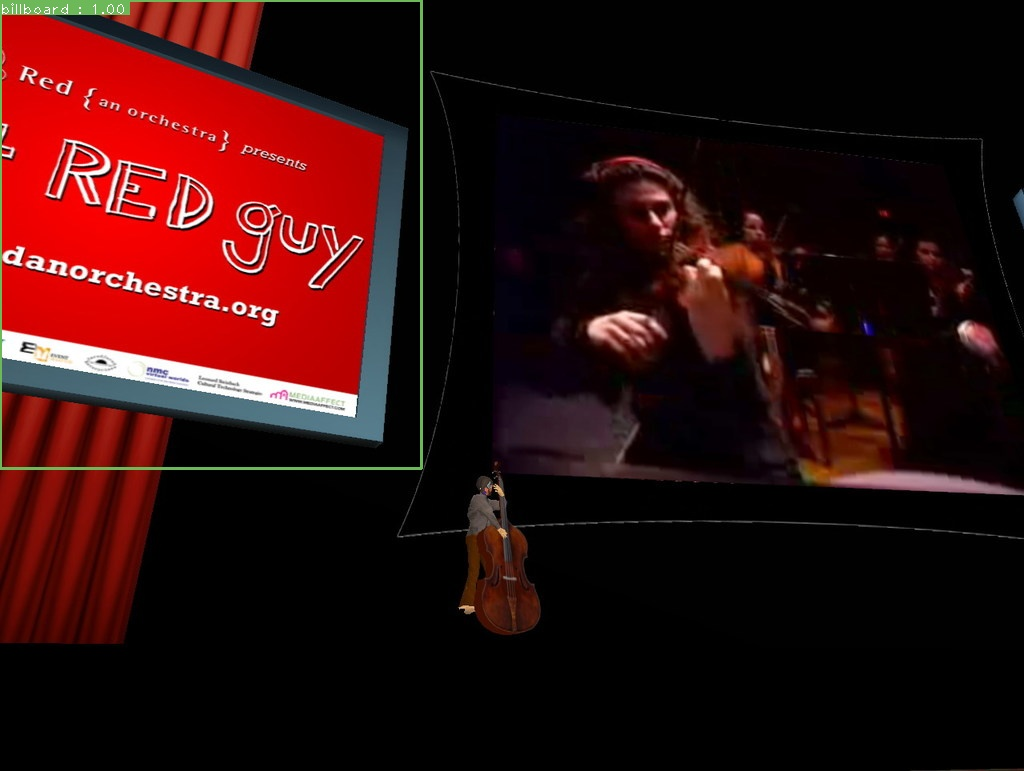

In [61]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img1.jpg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

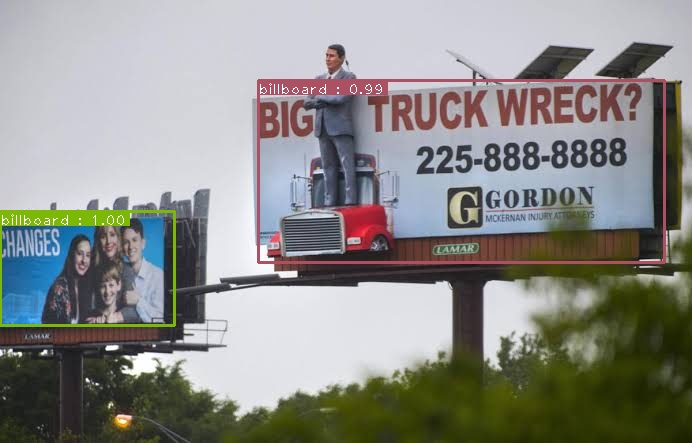

In [9]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img2.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

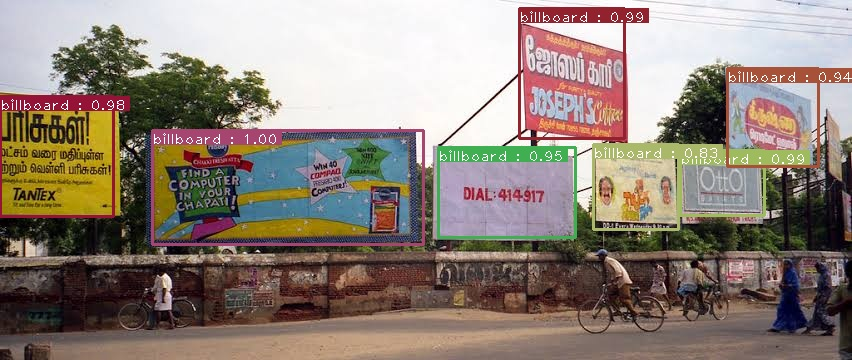

In [10]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img3.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

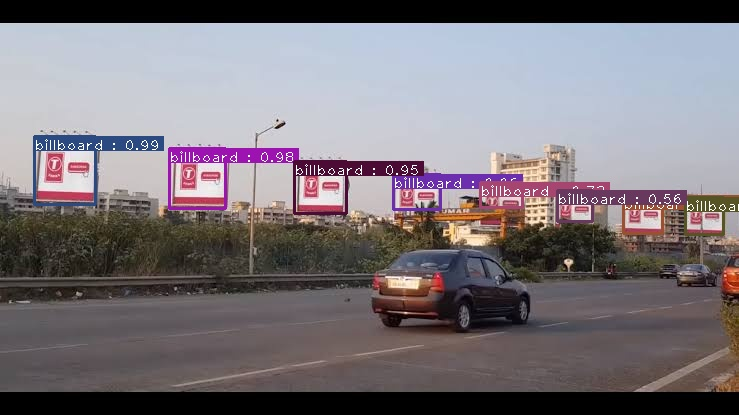

In [11]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img4.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

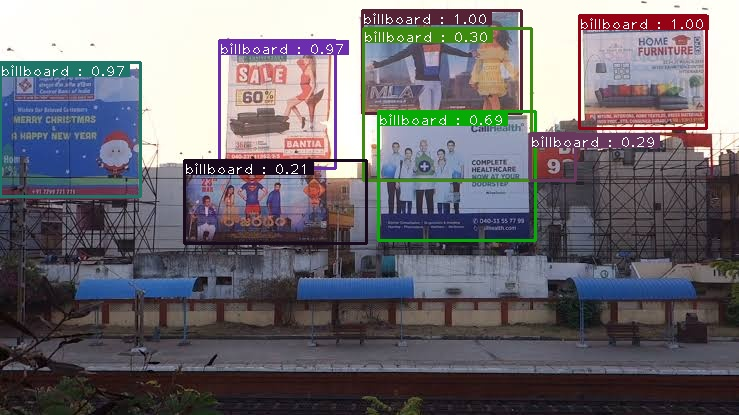

In [13]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img5.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

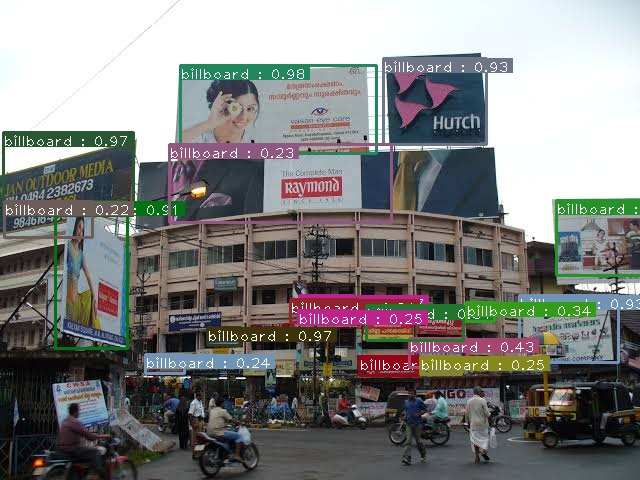

In [14]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img6.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

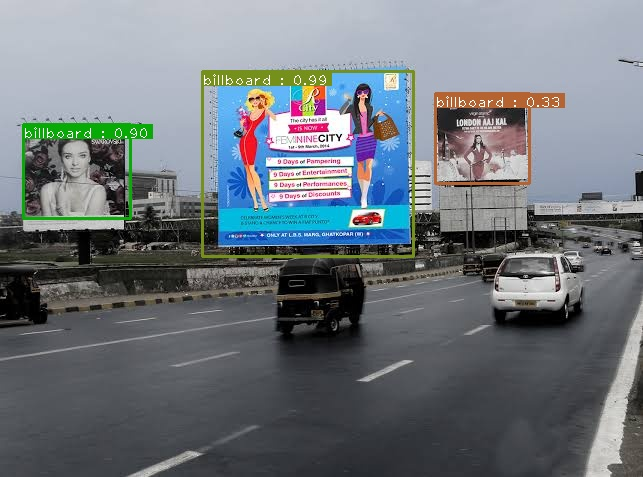

In [15]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img7.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

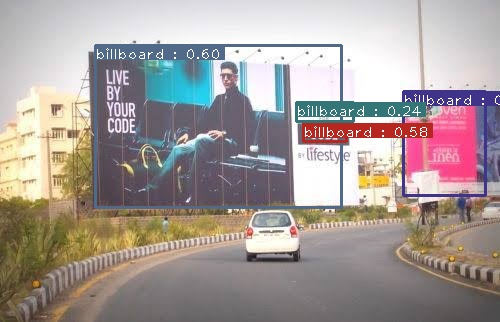

In [16]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img8.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

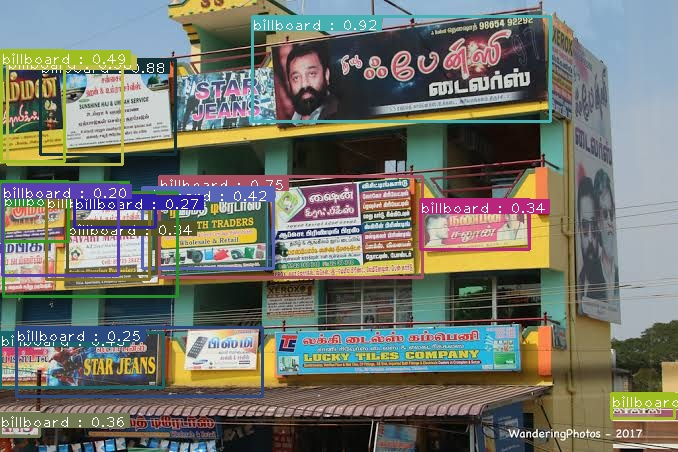

In [20]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img9.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

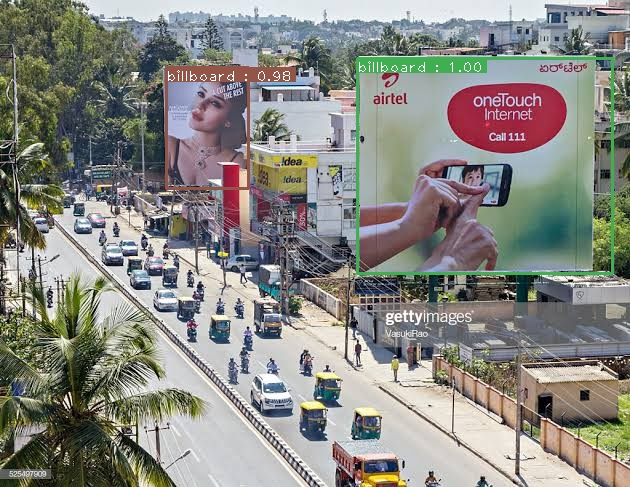

In [28]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img10.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

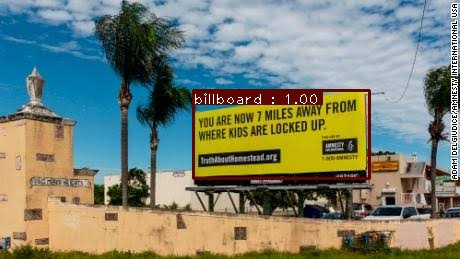

In [29]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img11.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

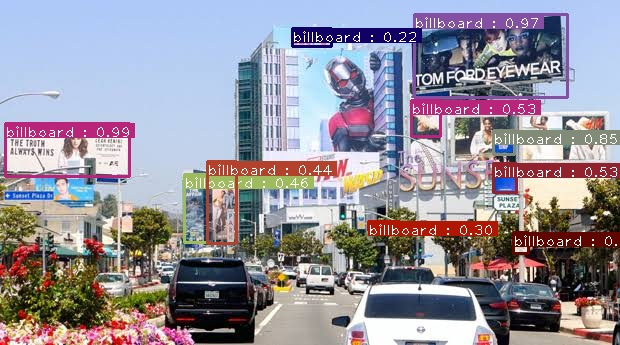

In [30]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img12.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

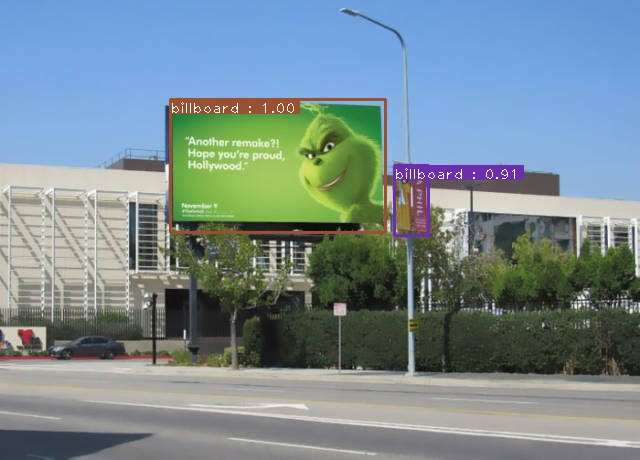

In [33]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img13.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

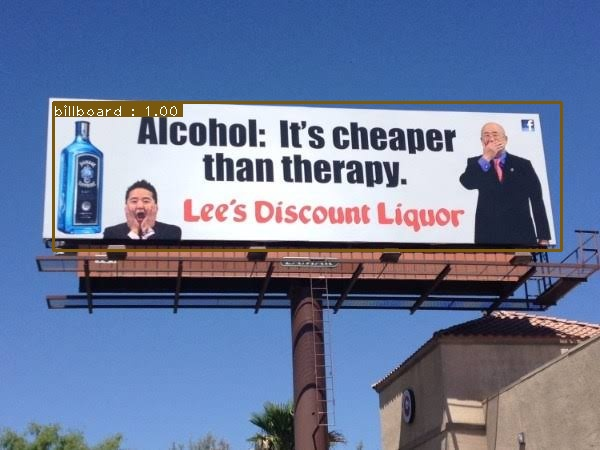

In [32]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img14.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

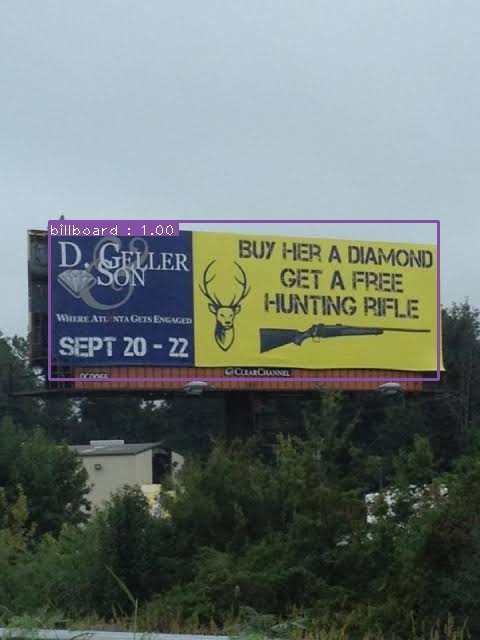

In [34]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img15.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

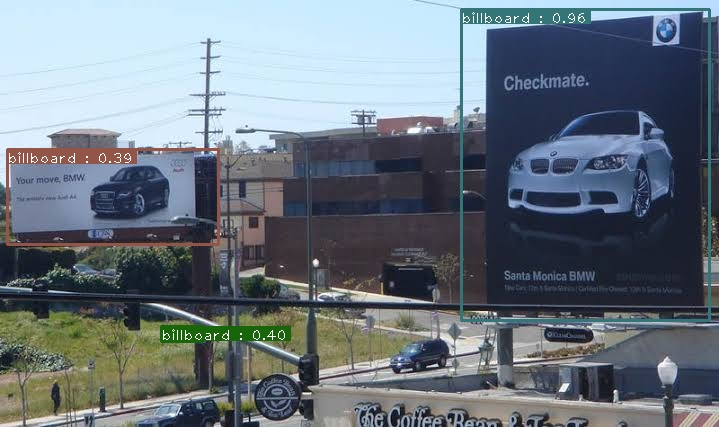

In [35]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img16.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.2);
from IPython.display import Image
Image(filename='output.jpg') 

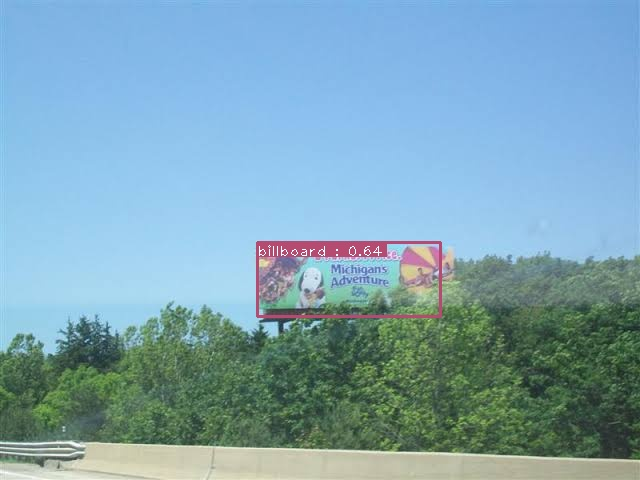

In [37]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img17.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

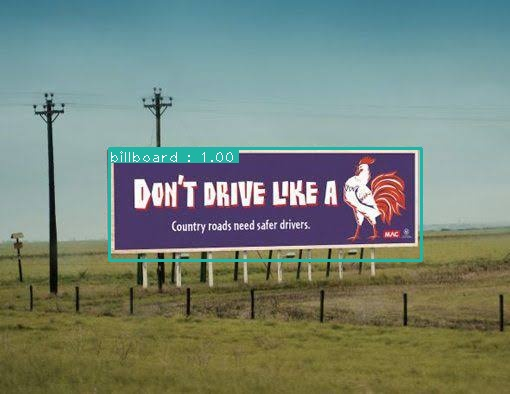

In [38]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img18.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 

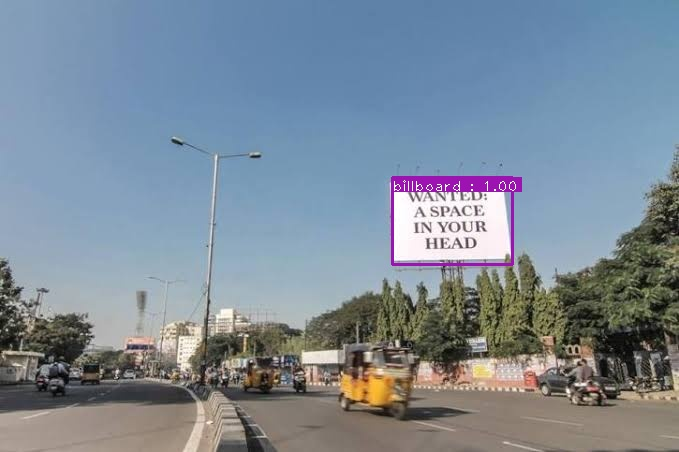

In [42]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img19.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.5);
from IPython.display import Image
Image(filename='output.jpg') 

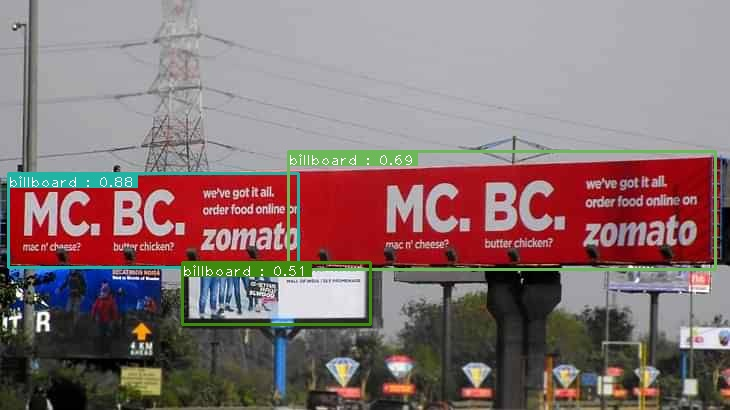

In [47]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/billboard_test/img20.jpeg";
scores, labels, boxes = gtf.Predict(img_path, class_list, vis_threshold=0.4);
from IPython.display import Image
Image(filename='output.jpg') 